In [2]:
import cv2
import numpy as np
import os

from matplotlib import pyplot

In [81]:
# open the yes and no

filepaths = {}

yes_folder = os.path.join('data','brain_tumor_dataset','yes')
no_folder = os.path.join('data','brain_tumor_dataset','no')

filepaths['yes'] = [os.path.join(yes_folder ,x)for x in next(os.walk(os.path.join(yes_folder)))[2]]
filepaths['no'] = [os.path.join(no_folder ,x)for x in next(os.walk(os.path.join(no_folder)))[2]]

filepaths['no'][0:5]

['data\\brain_tumor_dataset\\no\\1 no.jpeg',
 'data\\brain_tumor_dataset\\no\\10 no.jpg',
 'data\\brain_tumor_dataset\\no\\11 no.jpg',
 'data\\brain_tumor_dataset\\no\\12 no.jpg',
 'data\\brain_tumor_dataset\\no\\13 no.jpg']

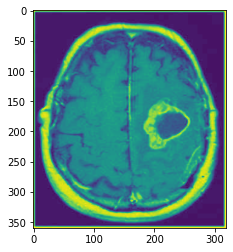

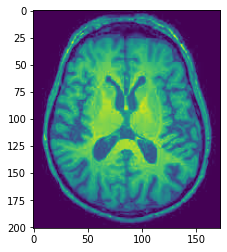

In [83]:
positives = [cv2.imread(x,0) for x in filepaths['yes']]
negatives = [cv2.imread(x,0) for x in filepaths['no']]

pyplot.imshow(positives[1])
pyplot.show()
pyplot.imshow(negatives[1])
pyplot.show()

In [92]:
def process_image(image, size=(224,224)):
    
    image = cv2.GaussianBlur(image, (5,5), 0)
    thresh = cv2.threshold(image, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    c = max(contours, key = cv2.contourArea)
    
    p0 = np.min(c,axis=0)[0]
    p1 = np.max(c,axis=0)[0]
    
    return cv2.resize(image[p0[1]:p1[1], p0[0]:p1[0]], size, interpolation=cv2.INTER_CUBIC)

In [93]:
format_yes = [process_image(x) for x in positives]
format_no = [process_image(x) for x in negatives]

In [94]:
output_path = os.path.join('data','formatted_data')

for i, image in enumerate(format_no):
    cv2.imwrite(os.path.join(output_path, 'no', str(i).zfill(3)+'_no.png'), image)
    
for i, image in enumerate(format_yes):
    cv2.imwrite(os.path.join(output_path, 'yes', str(i).zfill(3)+'_yes.png'), image)
